# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound

#  Work on minimum Profit and stop loss
## Stop loss was 1 pip in some transactions
### Min PL should be 1 pip
### Min SL should be 2 or 3 pip
### Why December 2021 is so bad : Analyse

In [2]:
# data = get_rolling_emas(data)
# data['df']['DateTime_frmt']   = [dt.datetime.strptime(x,"%Y%m%d %H:%M:%S.%f") for x in data["df"]['DateTime']]
# data['df'] = data['df'][['DateTime_frmt', 'Bid', 'Ask', 'tick', 'sema', 'slema', 'lema', 'tick_angle']]
# plotly_graph(data)
# data['df'].head(2)

In [3]:
data = run_engine(data)

100%|████████████████████████████████| 223001/223001 [00:24<00:00, 9041.31it/s]

pls   -0.05457
dtype: float64
--------------------------------------
             start_date ord_types          close_type      pls
254 2021-12-24 21:49:13      long         simple_stop -0.00154
255 2021-12-24 21:49:14      long         simple_stop -0.00154
256 2021-12-24 21:49:14      long         simple_stop -0.00154
257 2021-12-24 21:49:14      long         simple_stop -0.00154
258 2021-12-24 21:49:20      long         simple_stop -0.00154
259 2021-12-24 21:49:20      long         simple_stop -0.00154
260 2021-12-24 21:49:21      long         simple_stop -0.00154
261 2021-12-24 21:49:21      long         simple_stop -0.00154
262 2021-12-24 21:49:21      long         simple_stop -0.00154
263 2021-12-24 21:49:22      long         simple_stop -0.00154
264 2021-12-24 21:49:23      long         simple_stop -0.00154
265 2021-12-24 21:49:37      long         simple_stop -0.00184
266 2021-12-24 21:49:57      long  simple_take_profit  0.00039
267 2021-12-26 22:38:43      long  simple_take_pr

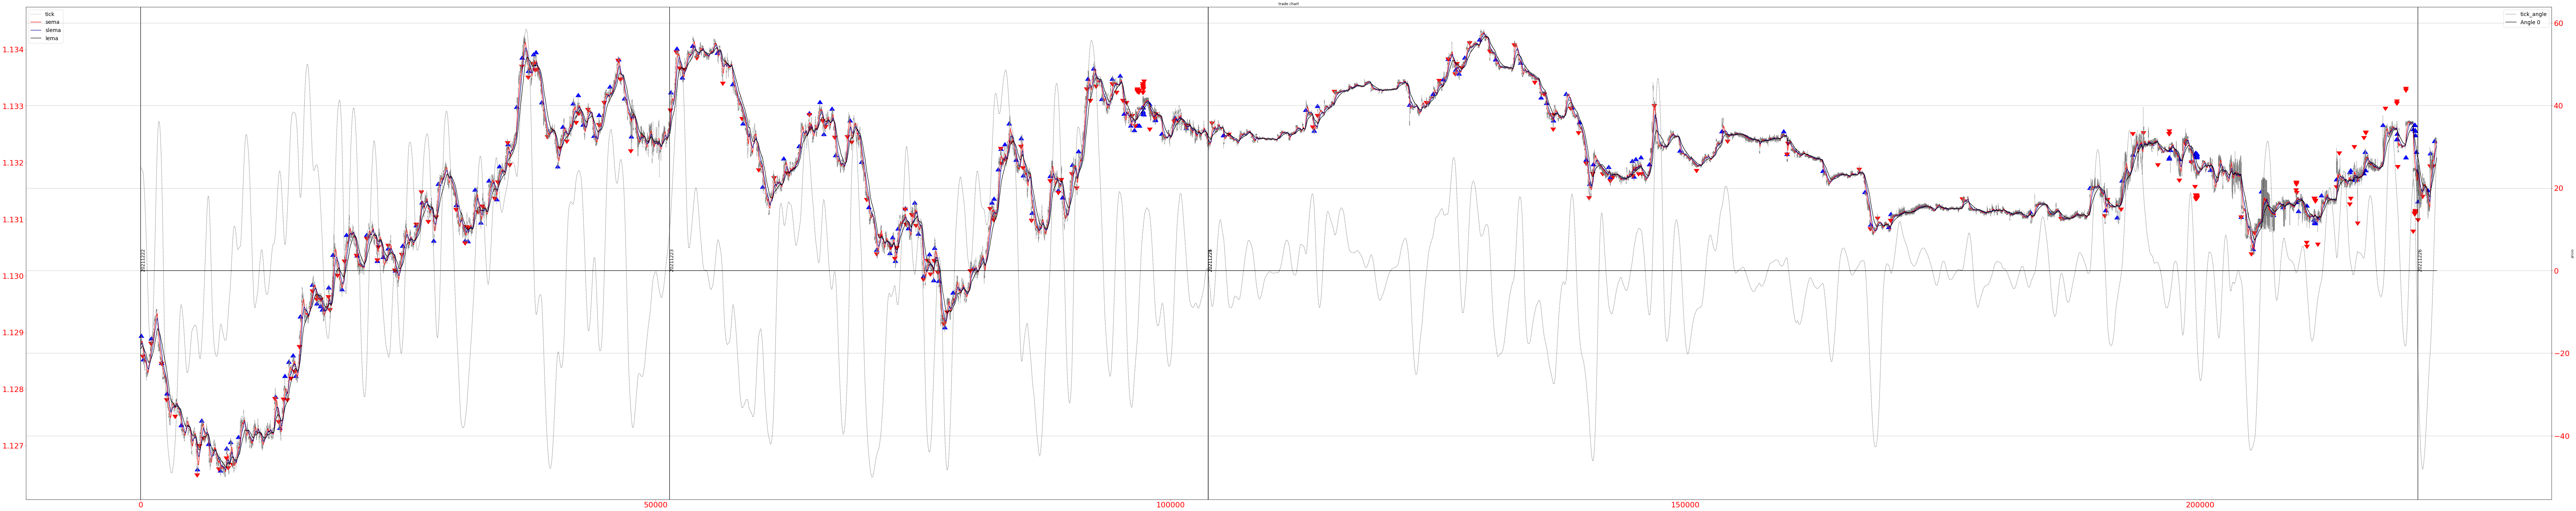

-----------------------------------------------------
Total PL : -0.054569999999999994
-------------
net_pl            : -0.05457/0.13389
-------------
+ve               : num= 137    sum= +0.03966    avg= +0.00029
-ve               : num= 132    sum= -0.09423    avg= -0.00071
-----------------------------------------------------
month_val
12   -0.05457
Name: pls, dtype: float64
-----------------------------------------------------
simple_take_profit    137
simple_stop           132
Name: close_type, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

In [5]:
data['report_df'].groupby(['date_val'])['pls'].sum()

date_val
22    0.00722
23   -0.00698
24   -0.05592
26    0.00111
Name: pls, dtype: float64

In [6]:
data['report_df'].groupby(['month_val'])['pls'].sum()

month_val
12   -0.05457
Name: pls, dtype: float64

In [7]:
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)
send_telegram_message(f'Run Complete : {data["df_name"]}')

In [8]:
temp = data['report_df'].groupby(['month_val'])['pls'].sum()

In [9]:
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)
send_telegram_message(f'Run Complete : {temp}')

In [10]:
temp1 = data['report_df']['pls'].sum()

In [11]:
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)
send_telegram_message(f'Run Complete : {temp1}')

In [12]:
data['report_df'].groupby(['close_type'])['pls'].count()

close_type
simple_stop           132
simple_take_profit    137
Name: pls, dtype: int64

In [13]:
data['report_df'].groupby(['close_type'])['pls'].mean()

close_type
simple_stop          -0.000714
simple_take_profit    0.000289
Name: pls, dtype: float64

In [14]:
data['report_df'].groupby(['close_type'])['pls'].sum()

close_type
simple_stop          -0.09423
simple_take_profit    0.03966
Name: pls, dtype: float64

In [15]:
data['report_df'].groupby(['close_type'])['pls'].count()

close_type
simple_stop           132
simple_take_profit    137
Name: pls, dtype: int64

In [16]:
x = np.round(data['report_df'].groupby(['month_val', 'date_val'])['pls'].sum().values.mean(),4)
print(f'Average pips per day : {x}')

Average pips per day : -0.0136


In [17]:
x = data['report_df'].groupby(['month_val', 'date_val'])['pls'].count().values.mean()
print(f'Average orders per day : {x}')

Average orders per day : 67.25


In [18]:
data['report_df'].groupby(['date'])['date'].count().value_counts().sort_values(ascending=False)

1    235
2     14
3      2
Name: date, dtype: int64

In [19]:
data['report_df']['duration'].sort_values(ascending=False)

5     0 days 02:16:40
64    0 days 01:22:12
148   0 days 01:18:32
12    0 days 01:08:42
149   0 days 01:04:43
            ...      
250   0 days 00:00:00
209   0 days 00:00:00
251   0 days 00:00:00
224   0 days 00:00:00
210   0 days 00:00:00
Name: duration, Length: 269, dtype: timedelta64[ns]